In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
import PIL

import persim
from ripser import ripser, lower_star_img

In [2]:
activations = np.load('../data/activations4096.npy')
scores = np.load('../data/scores4096.npy')

dgms = []
for i in range(len(activations)):
    dgm = lower_star_img(-activations[i])
    dgms.append(dgm)

In [3]:
#substitute inf with 10
dgms10=[]
for i in range(len(dgms)):
    dgms10.append(dgms[i])
    dgms10[i][-1,-1]=10

In [4]:
idxs=[0,110,310,510,710,910,1110,1310,3000,4000]

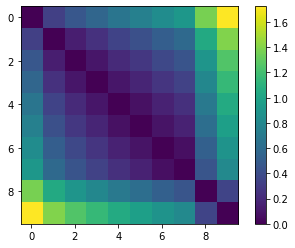

In [5]:
from itertools import combinations
sc = np.zeros((10,10))
for i,j in combinations(range(len(idxs)),2):
    sc[i,j] = scores[idxs[i]]-scores[idxs[j]]
plt.imshow(sc+sc.T)
plt.colorbar();

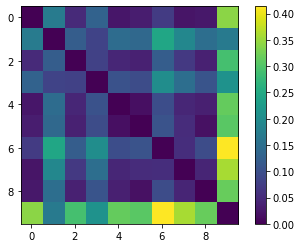

In [6]:
bnd = np.zeros((10,10))
for i,j in combinations(range(len(idxs)),2):
    bnd[i,j] = persim.bottleneck(dgms[idxs[i]],dgms[idxs[j]])
plt.imshow(bnd+bnd.T)
plt.colorbar();

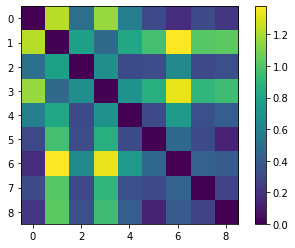

In [7]:
slw = np.zeros((9,9))
for i,j in combinations(range(len(idxs)-1),2):
    slw[i,j] = persim.sliced_wasserstein(dgms[idxs[i]][:-1],dgms[idxs[j]][:-1])
plt.imshow(slw+slw.T)
plt.colorbar();

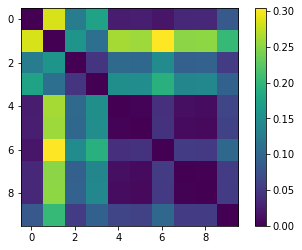

In [8]:
h = np.zeros((10,10))
for i,j in combinations(range(len(idxs)),2):
    h[i,j] = persim.heat(dgms[idxs[i]][:-1],dgms[idxs[j]][:-1])
plt.imshow(h+h.T)
plt.colorbar();

In [10]:
activations512 = np.load('../data/activations512.npy')
scores512 = np.load('../data/scores512.npy')
from itertools import combinations
sc = np.zeros((len(scores512),len(scores512)))
for i,j in combinations(range(len(scores512)),2):
    sc[i,j] = scores512[i]-scores512[j]
#plt.imshow(sc+sc.T)
#plt.colorbar();

In [11]:
m_bottle = np.load('../data/matrix_bottleneck.npy')
m_wasse = np.load('../data/matrix_sliced_wasse.npy')
m_heat = np.load('../data/matrix_heat_kernel.npy')

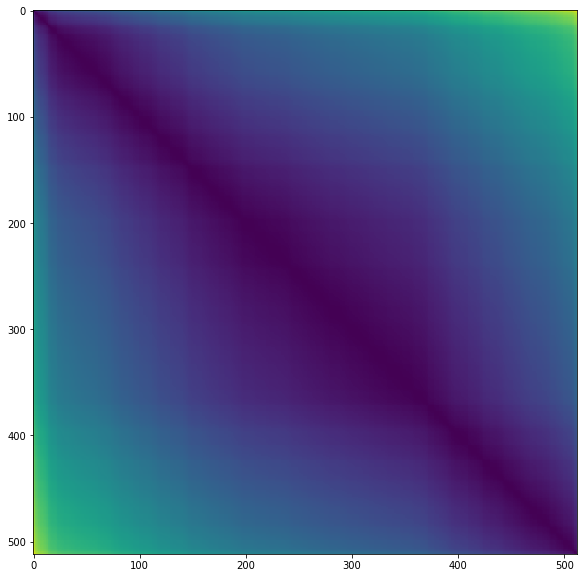

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(sc+sc.T)

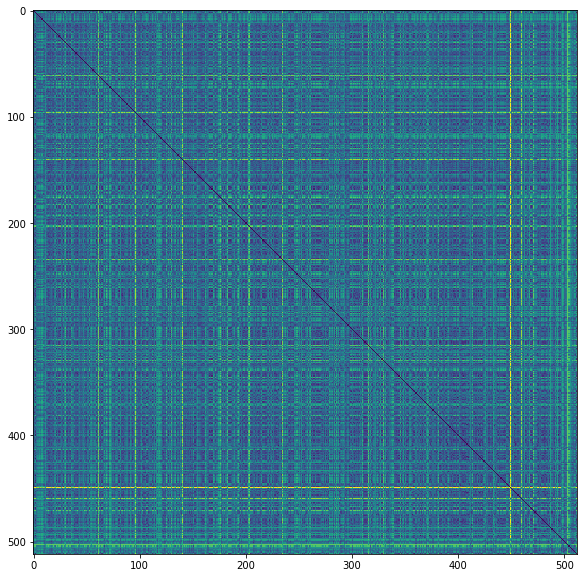

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(m_bottle+m_bottle.T);

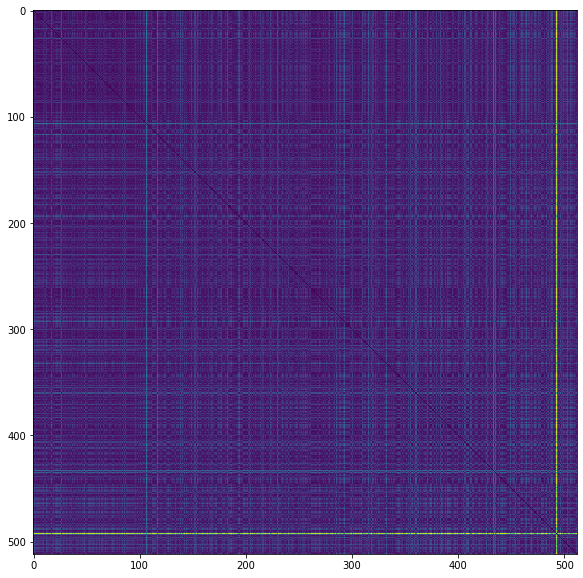

In [15]:
plt.figure(figsize=(10,10))
plt.imshow(m_wasse+m_wasse.T);

''

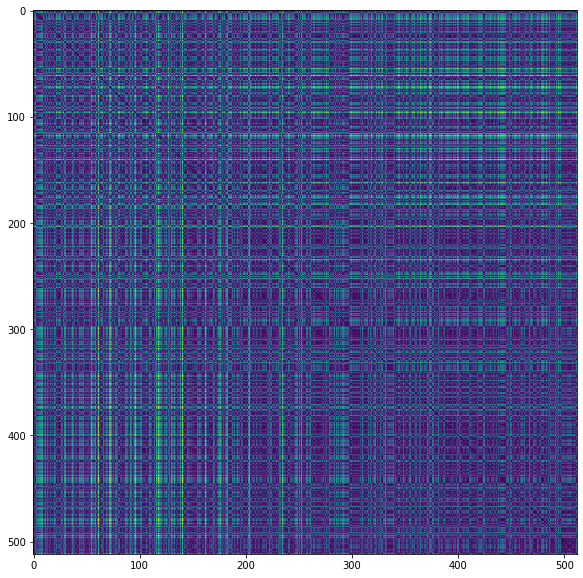

In [16]:
plt.figure(figsize=(10,10))
;plt.imshow(m_heat+m_heat.T);